# Assignment 3
by: _Kevin Adrián Rodríguez Ruiz_

karodriguezr@unal.edu.co

## Common vars and functions

The next functions are intended to hel in common utilites

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy import random
from sklearn.svm import LinearSVC, SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, chi2_kernel

# Point 1
Let $x={x_1,...,x_n}$ be a subset of an input data set X. Consider a kernel functionk: $X\times X\rightarrow \mathbb{R}$, which induces a feature space $\phi(X)$:

## (a)
Deduce an expression (using kernels) that, given a vector $w\in X$, calculates the norm ofthe projection of the image of a point $x,\phi(x)$, onto the image of the vector $w,\phi(w)$:

$$P_w=\frac{\langle \phi(w),\phi(x) \rangle}{\parallel\phi(w)\parallel}$$

### Solution

Takin into account that the length of a vector can be expressed as follows 
$$\parallel\phi(w)\parallel=\sqrt{\langle w,w \rangle}$$ 
and introducing and the kernel 
$$k(x_{1},x_{2}) = \langle x_{1},x_{2} \rangle$$ 
the equation for $P_w$ can be transformed into:

$$P_w=\frac{k(w,x) \rangle}{\sqrt{k(w,w)}}$$

## (b)
Deduce an expression (using kernels) to calculate the sample variance of the projectionsin the feature space of a set of points along a vector$w$:

$$var_{\phi(w)}(x)=\frac{1}{n}\sum_{x_i  \in x}(P_w(x_i)-\mu)^2$$

where 
$$\mu=\frac{1}{n}\sum_{x_i  \in x}P_w(x_i)$$
### Solution

Replacing $\mu$ in $var_{\phi(w)}(x)$

$$var_{\phi(w)}(x)=\frac{1}{n}\sum_{x_i  \in x}\bigg(P_w(x_i)-\frac{1}{n}\sum_{x_j  \in x}P_w(x_j)\bigg)^2$$

Replacing $P_w(x_i)$ by the expression obtained in the last point

$$var_{\phi(w)}(x)=\frac{1}{n}\sum_{x_i  \in x}\bigg(\frac{k(w,x_i) }{\sqrt{k(w,w)}}-\frac{1}{n}\sum_{x_j  \in x}\frac{k(w,x_j) }{\sqrt{k(w,w)}}\bigg)^2$$

$$var_{\phi(w)}(x)=\frac{1}{n}\sum_{x_i  \in x}\bigg(\frac{1}{\sqrt{k(w,w)}}\bigg)^2\bigg(k(w,x_i) -\frac{1}{n}\sum_{x_j  \in x}k(w,x_j)\bigg)^2$$

$$var_{\phi(w)}(x)=\frac{1}{n·k(w,w)}\sum_{x_i  \in x}\bigg(k(w,x_i) -\frac{1}{n}\sum_{x_j  \in x}k(w,x_j)\bigg)^2$$

## (b)
Use the previous expression to calculate the variance of the projections of the images ofthe elements of the following point set in $\mathbb{R}^2$, $x =\{(0,1),(−1,3),(2,4),(3,−1),(−1,−2)\}$ over the images of the vectors $w_1=(1,1)$ and $w_2= (−1,1)$, in the feature spaces inducedby the following kernels:

#### i. $k(x,y)=\langle x,y\rangle$
#### ii. $k(x,y) = \langle x,y\rangle^2$
#### iii. $k(x,y) = (\langle x,y\rangle+1)^5$
#### iv. $Gaussian\; kernel\; with\; \sigma=1$

In [3]:
def variance(kernel, points_x, vector_w):
    """
    :param kernel: k(x,y)
    :param points_x: x
    :param vector_w: w
    :return:
    """
    sum_i = 0
    n = len(points_x)
    for x_i in points_x:
        k_i = kernel(vector_w, x_i)
        sum_j = sum(kernel(vector_w, x_j) for x_j in points_x)
        sum_i += np.power(k_i - 1 / n * sum_j, 2)
    return 1 / n / kernel(vector_w, vector_w) * sum_i


def kernel_i(x_1, x_2):
    return np.dot(x_1, x_2)


def kernel_ii(x_1, x_2):
    return np.power(np.dot(x_1, x_2), 2)


def kernel_iii(x_1, x_2):
    return np.power(np.dot(x_1, x_2) + 1, 5)


def kernel_iv(x, z, sigma=1):
    x_minus_z = np.subtract(x, z)
    return np.exp(-np.dot(x_minus_z, x_minus_z) / 2 / sigma ** 2)


def point_c():
    x = [[0, 1], [-1, 3], [2, 4], [3, -1], [-1, -2]]
    w = [[1, 1], [-1, 1]]

    print("w = (1,1)")
    variance_i = variance(kernel_i, x, w[0])
    variance_ii = variance(kernel_ii, x, w[0])
    variance_iii = variance(kernel_iii, x, w[0])
    variance_iv = variance(kernel_iv, x, w[0])

    print(f"i. {variance_i}")
    print(f"ii. {variance_ii}")
    print(f"iii. {variance_iii}")
    print(f"iv. {variance_iv}")

    print("\nw = (-1,1)")
    variance_i = variance(kernel_i, x, w[1])
    variance_ii = variance(kernel_ii, x, w[1])
    variance_iii = variance(kernel_iii, x, w[1])
    variance_iv = variance(kernel_iv, x, w[1])

    print(f"i. {variance_i}")
    print(f"ii. {variance_ii}")
    print(f"iii. {variance_iii}")
    print(f"iv. {variance_iv}")


point_c()

w = (1,1)
i. 4.12
ii. 41.34
iii. 183362.81909465027
iv. 0.056746553733116524

w = (-1,1)
i. 3.7200000000000006
ii. 12.059999999999999
iii. 6494.993580246915
iv. 0.05457468115143238


# Point 2.
#### Digit recognition model understanding.

## (a) 
Get the data for the MNIST data set: http://scikit-learn.org/stable/datasets/index.html#downloading-datasets-from-the-mldata-org-repository.



Data shape: (1797, 64)


<Figure size 432x288 with 0 Axes>

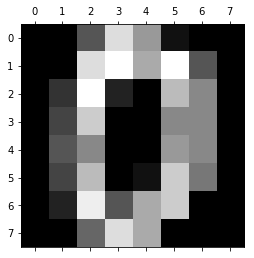

<Figure size 432x288 with 0 Axes>

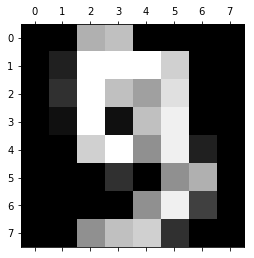

In [4]:
digits = datasets.load_digits()
digits_data = digits.data
print(f"Data shape: {digits.data.shape}")

plt.gray()
plt.matshow(digits.images[0])
plt.show()
plt.gray()
plt.matshow(digits.images[9])
plt.show()

## (b) 
Normalize your features so that each one has mean 0 and standard deviation 1.

#### Solution
The waty to make the mean of a dataset $X$ equals to zero is by substracting the mean from every point of the dataset.

$$X_{mean\ zero}=X-\bar{x}$$

To make the standard deviation equals to one, assuming a mean for the dataset of zero value, is necessary to multiply the dataset by a factor $k$. The formula to reach $k$ is:

$$std=\sqrt{\frac{\sum_{x_i}^X{{\lvert k\ x_i \rvert}^2}}{n}}=1$$
$$\frac{\sum_{x_i}^X{{\lvert k\ x_i \rvert}^2}}{n}=1$$
$$\sum_{x_i}^X{{\lvert k\ x_i \rvert}^2}=n$$

$$k=\sqrt{\frac{n}{\sum_{x_i}^X{{\lvert x_i \rvert}^2}}}$$


In [5]:
def normalize_b():
    digits_mean_zero = digits_data - digits_data.mean()
    sum_digits_sq = np.multiply(digits_mean_zero, digits_mean_zero).sum()
    factor = np.sqrt(len(digits_data) * len(digits_data[0]) / sum_digits_sq)
    digits_std_one = digits_mean_zero * factor
    return digits_std_one

In [6]:
print(f"Original data min: {digits_data.min()}")
print(f"Original data max: {digits_data.max()}")
print(f"Original data mean: {digits_data.mean()}")
print(f"Original data std: {digits_data.std()}")
digits_std_one = normalize_b()
print(f"Normalized mean: {digits_std_one.mean()}")
print(f"Normalized std: {digits_std_one.std()}")

Original data min: 0.0
Original data max: 16.0
Original data mean: 4.884164579855314
Original data std: 6.016787548672236
Normalized mean: 6.301766750793877e-18
Normalized std: 1.0000000000000002


## (c) 
Choose two classes (e.g. 1 and 0, or 6 and 9) and train a linear SVM to discriminate between them. Find an optimal complexity parameter, C, plotting the training and test error vs. the regularization parameter. Use a logarithmic scale for C,$\{2^{−15} ,2^{−14} ,...,2^{10}\}$. Discuss the results.

### Note:
The digits studied were **5** and __8__ do cross validation. The size of the training set was of 70%,
The training set was choosen randomly, then re-running the script will produce different results.


In [7]:
training_fraction = 0.7


def filter_classes_c(class_one, class_two):
    digits_std_one = normalize_b()
    classes_idx = np.append(np.where(digits.target == class_one), np.where(digits.target == class_two))
    digits_data_filtered = digits_std_one[classes_idx, :]
    digits_classes_filtered = digits.target[classes_idx]
    return digits_data_filtered, digits_classes_filtered


def classify_c(training_data, training_classes, test_data, test_classes, complexities):
    training_errors = np.zeros(len(complexities))
    test_errors = np.zeros(len(complexities))
    for idx, complexity in enumerate(complexities):
        linear_svm = LinearSVC(C=complexity, max_iter=5000, tol=1e-5)
        linear_svm.fit(training_data, training_classes)
        training_errors[idx] = 1.0 - linear_svm.score(training_data, training_classes)
        test_errors[idx] = 1.0 - linear_svm.score(test_data, test_classes)

    return training_errors, test_errors


def optimal_C_c(complexities_C, digit_1, digit_2):
    digits_filtered, digits_filtered_classes = filter_classes_c(digit_1, digit_2)
    digits_idxs = [i for i in range(len(digits_filtered))]
    random.shuffle(digits_idxs)
    samples_size = int(len(digits_idxs) * training_fraction)
    
    digits_training = digits_filtered[digits_idxs[0:samples_size]]
    digits_training_classes = digits_filtered_classes[digits_idxs[0:samples_size]]
    digits_test = digits_filtered[digits_idxs[samples_size - 1:len(digits_filtered)]]
    digits_test_classes = digits_filtered_classes[digits_idxs[samples_size - 1:len(digits_filtered)]]
    
    training_errors, test_errors = classify_c(digits_training, digits_training_classes, digits_test, digits_test_classes, complexities_C)
    optimal_idx = (test_errors + training_errors).argmin()
    return optimal_idx, test_errors, training_errors, digits_idxs


def plot_regularization_parameters_c(complexities_C, optimal_C, test_errors, training_errors, title=f"Cross Validation Plot"):
    plt.plot(complexities_C, training_errors, label='Training set')
    plt.plot(complexities_C, test_errors, label='Test set')
    max_val = test_errors.max() if test_errors.max() > training_errors.max() else training_errors.max()
    plt.plot([optimal_C, optimal_C], [0, max_val], linestyle=':', label=f'Optimal C: 2^{int(np.log2(optimal_C))}')
    plt.xlabel('Regularization parameter')
    plt.ylabel('Error')
    plt.title(title)
    plt.xscale('log', basex=2)
    plt.legend()
    plt.show()

Optimal C: 0.0078125


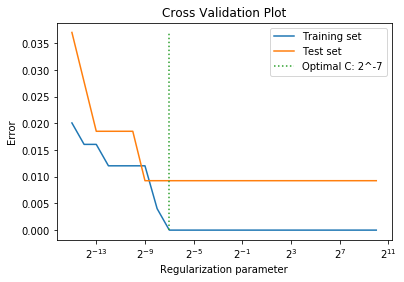

In [8]:
complexities_C = np.logspace(-15.0, 10.0, num=26, base=2)
optimal_idx, test_errors, training_errors, digits_idxs = optimal_C_c(complexities_C, 5, 8)
optimal_C = complexities_C[optimal_idx]
print(f"Optimal C: {optimal_C}")
plot_regularization_parameters_c(complexities_C, optimal_C, test_errors, training_errors)

### Discussion

From the plot can be remarked:
* With high values for the Regulation parameter, the classifier gets more overfit. This produces an error near to zero for the training data and an increasing error for the test set.
* With low values for the Regulation parameter, the error gets higher for both the training and the test set. It occurrs due to the little weight of the errors in the classifier.
* The optimal Regulation parameter can be found between $2^{-8}$ and $2^{-4}$

## (d)
Extract the weights of the classification model found in (b).


In [17]:
def weights_vector_d(digits_idxs, optimal_C, digit_1, digit_2):
    digits_filtered, digits_filtered_classes = filter_classes_c(digit_1, digit_2)
    samples_size = int(len(digits_idxs) * training_fraction)
    digits_training = digits_filtered[digits_idxs[0:samples_size]]
    digits_training_classes = digits_filtered_classes[digits_idxs[0:samples_size]]
    linear_svm = LinearSVC(C=optimal_C, max_iter=5000, tol=1e-5)
    linear_svm.fit(digits_training, digits_training_classes)
    weights_vector = linear_svm.coef_[0]
    return weights_vector

In [18]:
complexities_C = np.logspace(-15.0, 10.0, num=26, base=2)
optimal_idx, test_errors, training_errors, digits_idxs = optimal_C_c(complexities_C, 5, 8)
optimal_C = complexities_C[optimal_idx]
weights_vector = weights_vector_d(digits_idxs, optimal_C, 5, 8)
print(f"Weights vector:\n {weights_vector}")

Weights vector:
 [-0.01009457 -0.02929139 -0.10740779 -0.03311561  0.00745138 -0.0315155
 -0.10728754 -0.01451274 -0.00823378 -0.01930777 -0.04832672 -0.09314387
 -0.02332795  0.12790203 -0.02478905 -0.01672121 -0.00916417 -0.02938209
 -0.06695131 -0.04405019  0.21478909  0.26717074  0.07548673 -0.01009457
 -0.01009457 -0.09032365 -0.15711647  0.07918148  0.03087229  0.03462845
 -0.02337263 -0.01009457 -0.01009457 -0.0581822  -0.05779058  0.10888186
  0.06021408 -0.03946957 -0.07192556 -0.01009457 -0.01009457  0.05095003
  0.17560427  0.18972209  0.08026587  0.00299576  0.00325003 -0.01009457
 -0.01009457  0.03874555  0.02601125 -0.00080908 -0.07132235  0.03175074
  0.04117565 -0.00962581 -0.01009457 -0.01944588 -0.12199443 -0.06477537
  0.06995895  0.0908611  -0.00569975 -0.01009457]


## (e) 
Plot the discriminant function weights as follows:

__i.__ Arrange the weights in a matrix with the same shape as the input image.

__ii.__ Use a function such as pcolor http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pcolor to produce a color plot of the matrix.

__iii.__ Use a diverging colormap that emphasizes negative and positive values http://matplotlib.org/examples/color/colormaps_reference.html.

__iv.__ Discuss the results.


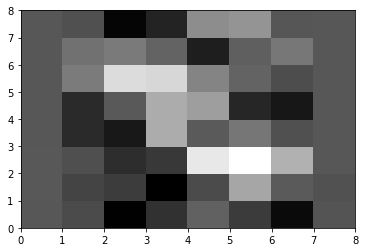

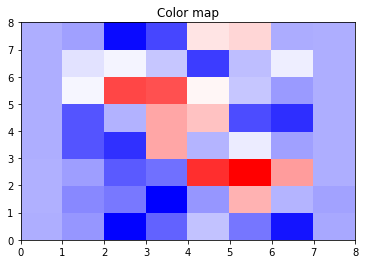

In [19]:
complexities_C = np.logspace(-15.0, 10.0, num=26, base=2)
optimal_idx, test_errors, training_errors, digits_idxs = optimal_C_c(complexities_C, 5, 8)
optimal_C = complexities_C[optimal_idx]
weights_vector = weights_vector_d(digits_idxs, optimal_C, 5, 8)
#  POINT E.i
weights_mesh = weights_vector.reshape((8, 8))
#  POINT E.ii
plt.pcolor(weights_mesh)
plt.show()
#  POINT E.iii
plt.pcolor(weights_mesh, cmap='bwr')
plt.title("Color map")
plt.show()

### Discussion

The most intense colors are located in the center of the image, it means that the weight vector have the higest values in this part and for a given "digit image", this region have a high influence over the results of the classifier.

## (f) 
Play with different pairs of digits and with different values for the C parameter (smaller values could produce smoother plots). Discuss the results.

In [20]:
def digits_classifier_f(complexities_C, digit_1, digit_2):
    print(f"Digits {digit_1} and {digit_2}")
    optimal_idx, test_errors, training_errors, digits_idxs = optimal_C_c(complexities_C, digit_1, digit_2)
    optimal_C = complexities_C[optimal_idx]
    print(f"Optimal C: {optimal_C}")
    plot_regularization_parameters_c(complexities_C, optimal_C, test_errors, training_errors, title=f"Cross Validation Plot. Digits {digit_1} and {digit_2}")
    weights_vector = weights_vector_d(digits_idxs, optimal_C, digit_1, digit_2)
    print(f"Weights vector:\n {weights_vector}")
    weights_mesh = weights_vector.reshape((8, 8))
    plt.pcolor(weights_mesh, cmap='bwr')
    plt.title(f"Color map. Digits {digit_1} and {digit_2}")
    plt.show()

Digits 0 and 6
Optimal C: 0.00257716388822831


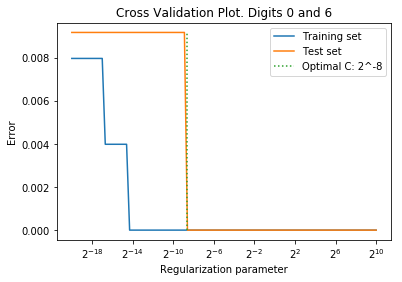

Weights vector:
 [ 2.02457572e-03  8.82388647e-04 -2.24681612e-02 -1.58720835e-02
 -1.76024430e-02  1.62562614e-03  2.44671951e-03  2.02457572e-03
  2.02457572e-03 -1.22483535e-02 -3.20220957e-02  2.90647300e-03
 -6.84678307e-02 -1.02203341e-01 -7.43661866e-03  2.02457572e-03
  2.02457572e-03 -2.21976096e-02 -5.89151776e-03  1.78429592e-02
 -1.22346497e-02 -1.42220736e-01 -2.87355249e-02  2.02457572e-03
  2.02457572e-03 -2.76016245e-03  7.19480119e-03  5.08816672e-02
  6.52134872e-02 -8.04978133e-02 -6.54982394e-02  2.02457572e-03
  2.02457572e-03  4.77357188e-03  2.89161901e-02  1.15650804e-01
  1.21401388e-01  1.48458721e-03 -5.00047359e-02  2.02457572e-03
  2.02457572e-03  2.84718351e-04  1.43263825e-02  7.08731580e-02
  5.35291266e-02 -3.52039592e-03  9.42772747e-03  2.29975785e-03
  2.02457572e-03 -1.10852947e-04 -1.25015759e-02  1.48344515e-02
 -5.05376972e-02 -7.05960144e-03  5.16387323e-02  3.52506849e-03
  2.02457572e-03  1.84500189e-03 -1.49867975e-02 -2.10398096e-02
  1.4365

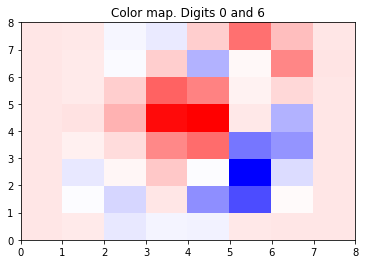

Digits 0 and 9
Optimal C: 3.270793037525308e-05


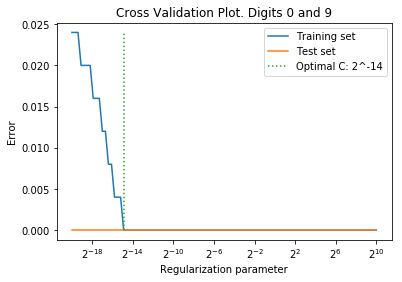

Weights vector:
 [-1.16227112e-04 -1.43115206e-05  1.44026107e-03 -1.84455334e-03
 -3.15796942e-04  3.90923632e-03  2.04904712e-03  1.00621169e-04
 -1.16227112e-04  1.63941550e-03 -2.31740655e-04 -4.22481345e-03
 -1.32202857e-03  1.78932089e-04  2.32087240e-03  1.01421801e-04
 -1.16227112e-04 -3.81472228e-04 -2.09545626e-03  9.25061912e-04
  7.88664654e-03  2.46121735e-03 -3.55344993e-04 -3.71400348e-05
 -1.16227112e-04 -4.30473460e-03 -2.55758197e-03  1.29152471e-02
  1.61837559e-02  6.41575949e-03 -3.42740456e-03 -1.16227112e-04
 -1.16227112e-04 -7.05848014e-03 -1.05260039e-02  5.48649800e-03
  5.95457195e-03  4.09968195e-03 -3.06648197e-03 -1.16227112e-04
 -1.16227112e-04 -4.50433592e-03 -1.57592616e-02 -1.46388698e-03
  1.10439411e-03 -1.52388763e-03 -3.04161861e-04 -7.74654633e-05
 -1.16227112e-04 -4.60146283e-04 -9.09351235e-03 -6.26682016e-03
 -5.41228733e-03 -3.58543742e-03  3.22875310e-03  7.96497453e-05
 -1.16227112e-04 -1.58339841e-05  1.46709384e-03 -2.13620095e-03
 -3.5917

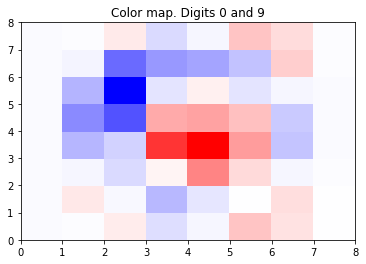

Digits 3 and 8
Optimal C: 0.005920767837931241


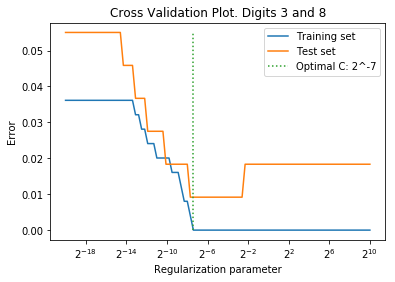

Weights vector:
 [-1.76443683e-04 -1.27428771e-02 -2.07250832e-02 -5.33279739e-02
 -7.29378185e-02 -2.96957024e-02 -3.44021729e-02 -1.99041533e-03
  2.51670278e-03 -3.58219048e-02 -2.41105746e-02 -1.62998365e-02
 -4.62589136e-02  3.83588164e-03  5.25215463e-03 -2.15634495e-03
  5.62047429e-04  2.40007534e-02  1.51262028e-01  9.03720008e-02
 -9.13482342e-02  6.42762659e-02  2.75929309e-02 -1.76443683e-04
 -1.76443683e-04  3.62622854e-03  1.58427347e-01  1.28256522e-01
 -1.01830084e-02  6.23359285e-02  2.17006819e-02 -1.76443683e-04
 -1.76443683e-04  7.81942549e-03  1.02068679e-01  1.05597904e-01
  3.77464614e-02 -4.28932719e-02 -4.25127953e-02 -1.76443683e-04
 -1.76443683e-04  1.71510133e-02  2.22641486e-01  1.92060726e-01
  1.92678267e-02 -3.23895901e-02 -6.99509979e-02 -1.76443683e-04
 -1.76443683e-04 -6.21596215e-03  4.38037067e-02  2.82583549e-02
 -7.25116441e-02 -4.28616563e-02 -7.64871113e-02 -2.22366860e-03
 -1.76443683e-04 -1.15858382e-02 -7.18464725e-02 -4.45756451e-02
  1.4856

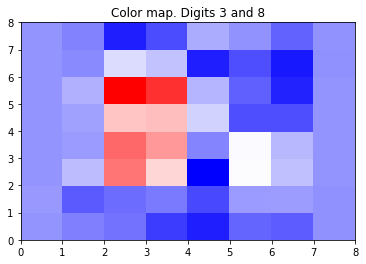

Digits 4 and 9
Optimal C: 0.016746460352129577


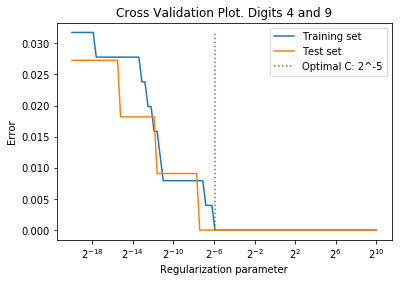

Weights vector:
 [ 1.14565051e-03  1.51842730e-03  4.65454505e-02  4.76608968e-02
  6.35365270e-02  2.04729637e-01  1.21070282e-01 -8.38496383e-03
  1.14565051e-03  5.30099878e-02  9.62129917e-02  2.05998010e-02
  9.15266645e-02  1.23082074e-01  5.74838884e-02 -5.32872076e-02
  1.14565051e-03  5.58458398e-02  2.92634461e-02 -6.35422284e-02
 -4.17623191e-02  5.62860302e-02 -1.14887081e-02 -4.16282423e-02
  8.19773713e-04 -4.62425522e-02 -8.56216400e-03  3.70369649e-02
  3.16425951e-02  1.91559950e-02 -1.19633112e-01 -2.56428067e-03
  1.14565051e-03 -1.31664907e-01 -1.29840013e-01 -5.78269545e-02
 -8.51772686e-02 -5.13988847e-03 -5.94446690e-02  1.14565051e-03
  1.14565051e-03 -3.45919972e-02 -7.96457049e-02 -1.82385272e-01
 -1.34277497e-01  2.31774952e-02  4.01702550e-02  1.14565051e-03
  1.14565051e-03 -7.23749042e-05 -4.39261672e-02 -5.99801437e-02
 -4.08765617e-02  5.13082719e-02  5.95021848e-02  3.98840012e-03
  1.14565051e-03  1.49215724e-03  2.84487659e-02  1.98345638e-02
  2.3225

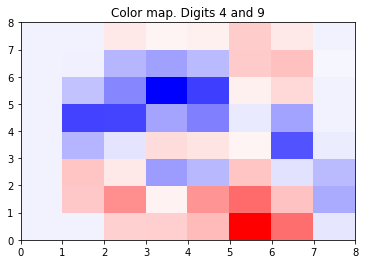

In [21]:
complexities_C = np.logspace(-20.0, 10.0, num=101, base=2)
digits_classifier_f(complexities_C, 0, 6)
digits_classifier_f(complexities_C, 0, 9)
digits_classifier_f(complexities_C, 3, 8)
digits_classifier_f(complexities_C, 4, 9)

### Discussion

In the case of digits 0 and 9, this pair holds the lowest optimal C (In a regular run: $C=2^{-15}$). One reason can be due to both digits are the most visually different of the four pairs evaluated, then a big error is not necessary for a good classification. In addition, the colormap for this pair have the less intense colors.

In the case of digits 4 and 9, this pair have the highest optimal C (In a regular run: $C=2^{-5}$). It means that a big weight for errors is required for a good classification. In addition, the training and the test data reach the lower error with the same $C$, which is a good sign.

In the case of digits 3 and 8, this pair presents a higer sensibilty to C compared with the others. That is reflected in the error plot for this pair, which contains more peaks compared with the others. In addition, the colormap contains more regions with intense colors, hence there are more decisive regions at the moment of classifying a digit between 3 and 8.

# Point 3.
### Train an SVM for detecting whether a word belongs to French or Spanish.

## (a)
Build training and test data sets. You can use the most frequent words in http://en.wiktionary.org/wiki/Wiktionary:Frequency_lists. Consider words at least 4 characters long and ignore accents.

### Solution
Using the datasets labeled as:
* [The 500 most frequently used French words](http://frequencylists.blogspot.com.br/2016/05/the-500-most-frequently-used-french.html)
* [The 500 most frequently used Spanish words](http://frequencylists.blogspot.com.br/2016/05/the-500-most-frequently-used-spanish.html)

The preprocessing consisted in the replacement of the vowels with accent by the clear vowels and the removal of all the words with less than four letters.
The set was randomly rearranged, the 70% of the words became in the training set and the remaining  30% in the testing set.

In [3]:
spanish_words_file = "./spanish_words_500.data"
french_words_file = "./french_words_500.data"
misclassified_words = {}

with open(spanish_words_file, 'r') as words_file:
    spanish_words = [line.replace('\n', '') for line in words_file.readlines()]
with open(french_words_file, 'r') as words_file:
    french_words = [line.replace('\n', '') for line in words_file.readlines()]

# spanish_words = spanish_words[0:100]
# french_words = french_words[0:100]

words_data = np.append(spanish_words, french_words)
words_classes = np.append(np.full(len(spanish_words), 'S'), np.full(len(french_words), 'F'))

training_fraction = 0.7
words_idxs = [i for i in range(len(words_data))]
random.shuffle(words_idxs)
training_size = int(len(words_idxs) * training_fraction)
words_training = words_data[words_idxs[0:training_size]]
words_training_classes = words_classes[words_idxs[0:training_size]]
words_test = words_data[words_idxs[training_size - 1:len(words_data)]]
words_test_classes = words_classes[words_idxs[training_size - 1:len(words_data)]]

print(f"Entire dataset size: {len(words_data)}")
print(f"Training set size: {training_size}")
print(f"Test set size: {len(words_data) - training_size}")

Entire dataset size: 791
Training set size: 553
Test set size: 238


## (b) 
Implement different string kernels:

__i.__ Histogram cosine kernel: calculate a bag of n-grams representation (use the CountVectorizer from scikit-learn) and apply the cosine_similarity from scikit-learn.
    
__ii.__ Histogram intersection: calculate a bag of n-grams representation, normalize it (the sum of the bins must be equal to 1) and calculate the sum of the minimum for each bin of the histogram.
    
__iii.__ $X^2$ kernel: calculate a bag of n-grams representation and apply the chi2_kernel from scikit-learn.
    
 __iv.__ SSK kernel: use the code available at this repository https://github.com/helq/python-ssk.
 

In [16]:
import pyximport; pyximport.install()
from string_kernel import ssk, string_kernel

words_vectorizer = CountVectorizer(analyzer="char", ngram_range=(1, 1))
# words_data = [re.sub(r'(.)', r'\1 ', word) for word in words_data]
words_term_document = words_vectorizer.fit_transform(words_training)
feature_names = words_vectorizer.get_feature_names()
print("n-grams features:")
print(f"Size: {len(feature_names)}")
print(f"Features:\n{feature_names}")

def cosine_kernel(word_one, word_two, vectorizer=words_vectorizer):
    word_one_terms, word_two_terms = tuple(vectorizer.transform([word_one, word_two]).toarray())
    return cosine_similarity([word_one_terms], [word_two_terms])[0][0]


def intersection_kernel(word_one, word_two, vectorizer=words_vectorizer):
    word_one_terms, word_two_terms = tuple(vectorizer.transform([word_one, word_two]).toarray())
    word_one_terms, word_two_terms = (word_one_terms / word_one_terms.sum(), word_two_terms / word_two_terms.sum())
    intersection = [letter_term if letter_term < word_two_terms[idx] else word_two_terms[idx] for idx, letter_term in enumerate(word_one_terms)]
    return np.sum(intersection)


def chi_square_kernel(word_one, word_two, vectorizer=words_vectorizer):
    word_one_terms, word_two_terms = tuple(vectorizer.transform([word_one, word_two]).toarray())
    return chi2_kernel([word_one_terms], [word_two_terms])[0][0]


def ssk_kernel(word_one, word_two, vectorizer=words_vectorizer):
    max_substring = vectorizer.ngram_range[1]
    return ssk(word_one, word_two, max_substring, .5, accum=True)

n-grams features:
Size: 26
Features:
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 'z', 'ç', 'ñ']


In [17]:
print("\nComparing kernel result for words [gato, perro] (1), [gato, gatto] (2), and [gato, gata](3)\n")
print("\ncosine_kernel")
print(f'1. {cosine_kernel("gato", "perro")}')
print(f'2. {cosine_kernel("gato", "gatto")}')
print(f'3. {cosine_kernel("gato", "gata")}')

# point b.ii
print("\nintersection_kernel")
print(f'1. {intersection_kernel("gato", "perro")}')
print(f'2. {intersection_kernel("gato", "gatto")}')
print(f'3. {intersection_kernel("gato", "gata")}')

# point b.iii
print("\nchi_square_kernel")
print(f'1. {chi_square_kernel("gato", "perro")}')
print(f'2. {chi_square_kernel("gato", "gatto")}')
print(f'3. {chi_square_kernel("gato", "gata")}')

# point b.iv
print("\nssk_kernel")
print(f'1. {ssk_kernel("gato", "perro")}')
print(f'2. {ssk_kernel("gato", "gatto")}')
print(f'3. {ssk_kernel("gato", "gata")}')



Comparing kernel result for words [gato, perro] (1), [gato, gatto] (2), and [gato, gata](3)


cosine_kernel
1. 0.1889822365046136
2. 0.9449111825230679
3. 0.8164965809277261

intersection_kernel
1. 0.2
2. 0.8500000000000001
3. 0.75

chi_square_kernel
1. 0.0009118819655545162
2. 0.7165313105737893
3. 0.26359713811572677

ssk_kernel
1. 0.25
2. 1.25
3. 1.0


## (c)
Use scikit-learn to train different SVMs using precomputed kernels. Use cross validation to find appropriate regularization parameters. Try different configurations of the
parameters (in particular different n values for the n-grams).
#### note
In the case of the kernel SSK, the parameter decay parameter was set in $\lambda=0.5$ and the max_substring parameter was set the same as the max number in the $n-grams_{range}$


In [19]:
misclassified_words = {}
def make_training_kernel_matrix(kernel, training_data, vectorizer=words_vectorizer):
    kernel_matrix = np.zeros((len(training_data), len(training_data)))
    for idx, data_col in enumerate(training_data):
        kernel_matrix[idx][idx] = kernel(data_col, data_col, vectorizer=vectorizer)
        for jdx, data_row in enumerate(training_data):
            if jdx > idx:
                kernel_val = kernel(data_col, data_row, vectorizer=vectorizer)
                kernel_matrix[idx][jdx] = kernel_val
                kernel_matrix[jdx][idx] = kernel_val
    return kernel_matrix


def make_kernel_matrix(kernel, test_data, training_data, vectorizer=words_vectorizer):
    kernel_matrix = np.zeros((len(test_data), len(training_data)))
    for idx, data_col in enumerate(test_data):
        for jdx, data_row in enumerate(training_data):
            kernel_matrix[idx][jdx] = kernel(data_col, data_row, vectorizer=vectorizer)
    return kernel_matrix


def cross_validation_scores(ngram_maxs, kernels, complexities):
    scores = np.zeros((len(ngram_maxs), len(kernels), len(complexities), 2))
    for idx, ngram_max in enumerate(ngram_maxs):
        vectorizer = CountVectorizer(analyzer="char", ngram_range=(1, ngram_max))
        vectorizer.fit(words_training)
        features = vectorizer.get_feature_names()
        print(f"Number of features: {len(features)}")
        print(f"Features:\n{features}")
        scores[idx] = [cross_validation_complexities(vectorizer, kernel, complexities) for kernel in kernels]
    return scores


def cross_validation_complexities(vectorizer, kernel, complexities):
    kernel_training = make_training_kernel_matrix(kernel, words_training, vectorizer)
    kernel_test = make_kernel_matrix(kernel, words_test, words_training, vectorizer)
    scores = np.zeros((len(complexities), 2))
    for idx, complexity in enumerate(complexities):
        svm = SVC(kernel='precomputed', C=complexity)
        svm.fit(kernel_training, words_training_classes)
        prediction_training = svm.predict(kernel_training)
        prediction_test = svm.predict(kernel_test)
        # score_training = svm.score(kernel_training, words_training_classes)
        # score_test = svm.score(kernel_test, words_test_classes)

        score_test, score_training = compute_scores(prediction_test, prediction_training)
        scores[idx] = [score_training, score_test]
    print(f"scores: {scores}")
    return scores


def compute_scores(prediction_test, prediction_training):
    differences_training = prediction_training == words_training_classes
    differences_test = prediction_test == words_test_classes
    score_training = differences_training.sum() / len(differences_training)
    score_test = differences_test.sum() / len(differences_test)
    misclassified = np.append(words_training[differences_training], words_test[differences_test])
    for word in misclassified:
        misclassified_words[word] = 1 if word not in misclassified_words else misclassified_words[word] + 1
    return score_test, score_training

In [21]:
ngram_maxs = [1, 2, 3]
kernels = [cosine_kernel, intersection_kernel, chi_square_kernel, ssk_kernel]
complexities = [2 ** -15, 2 ** -10, 2 ** -5, 2, 2 ** 5]
cross_validation = cross_validation_scores(ngram_maxs, kernels, complexities)


Number of features: 26
Features:
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 'z', 'ç', 'ñ']
scores: [[0.52260398 0.44769874]
 [0.52260398 0.44769874]
 [0.55515371 0.49372385]
 [0.69981917 0.65690377]
 [0.71790235 0.66945607]]
scores: [[0.52260398 0.44769874]
 [0.52260398 0.44769874]
 [0.5244123  0.44769874]
 [0.73960217 0.70292887]
 [0.7920434  0.69874477]]
scores: [[0.52260398 0.44769874]
 [0.52260398 0.44769874]
 [0.52260398 0.44769874]
 [0.98553345 0.67782427]
 [0.98553345 0.66945607]]
scores: [[0.52260398 0.44769874]
 [0.52260398 0.44769874]
 [0.66726944 0.59414226]
 [0.69801085 0.65690377]
 [0.69439421 0.65271967]]
Number of features: 266
Features:
['a', 'ab', 'ac', 'ad', 'af', 'ag', 'ai', 'aj', 'al', 'am', 'an', 'ap', 'aq', 'ar', 'as', 'at', 'au', 'av', 'ay', 'az', 'añ', 'b', 'ba', 'be', 'bi', 'bl', 'bo', 'br', 'bu', 'c', 'ca', 'cc', 'ce', 'ch', 'ci', 'cl', 'co', 'cr', 'cu', 'd', 'da', 'de', 'di', 'do', 'dr',

scores: [[0.52260398 0.44769874]
 [0.52260398 0.44769874]
 [0.52260398 0.44769874]
 [0.95840868 0.84100418]
 [0.99095841 0.82845188]]
scores: [[0.52260398 0.44769874]
 [0.52260398 0.44769874]
 [0.52260398 0.44769874]
 [0.97106691 0.82845188]
 [0.99276673 0.82845188]]
scores: [[0.52260398 0.44769874]
 [0.52260398 0.44769874]
 [0.52260398 0.44769874]
 [0.99276673 0.54393305]
 [0.99276673 0.54393305]]
scores: [[0.52260398 0.44769874]
 [0.52260398 0.44769874]
 [0.68716094 0.62343096]
 [0.92947559 0.83682008]
 [0.99276673 0.80753138]]


## (d) 
Evaluate the performance of the SVMs in the test data set:

__i.__ Report the results in a table for the different evaluated configurations.

__ii.__ Illustrate examples of errors (French words mistaken as Spanish, Spanish words mistaken as French). Give a possible explanation for these mistakes.

__iii.__ Discuss the results.

In [24]:
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in
        IPython Notebook. """

    def _repr_html_(self):
        html = ["<table>"]
        for ridx, row in enumerate(self):
            html.append("<tr>")
            for col in row:
                html.append(f"<td>{col}</td>" if ridx != 0 else f"<th>{col}</th>")
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)


## i.
The table below present the scores for training and test set for all the possible configurations between the next parameters:

$$n-grams_{range}=\big[(1,1),(1,2),(1,3)\big]$$

$$kernels=\big[histogram\ cosine,\ histogram\ intersection,\ \chi^2,\ SSK \big]$$

$$C=\big[2^{-10},2^{-5},2,2^5\big]$$

In [26]:
kernel_names = ['cosine_kernel', 'intersection_kernel', 'chi_square_kernel', 'ssk_kernel']
scores_table = ListTable()
scores_table.append(['Kernel', 'Regulation parameter', 'Max. n-gram', 'Score training set', 'Score test set'])
for n, ngram in enumerate(cross_validation):
    for k, kernel in enumerate(ngram):
        for c, complexity_scores in enumerate(kernel):
            scores_table.append([kernel_names[k], f"2^{int(np.log2(complexities[c]))}", ngram_maxs[n], f"{complexity_scores[0] * 100:.2f}%", f"{complexity_scores[1] * 100:.2f}%"])

print("Table 3.d.i.")
scores_table

Table 3.d.i.


Kernel,Regulation parameter,Max. n-gram,Score training set,Score test set
cosine_kernel,2^-15,1,52.26%,44.77%
cosine_kernel,2^-10,1,52.26%,44.77%
cosine_kernel,2^-5,1,55.52%,49.37%
cosine_kernel,2^1,1,69.98%,65.69%
cosine_kernel,2^5,1,71.79%,66.95%
intersection_kernel,2^-15,1,52.26%,44.77%
intersection_kernel,2^-10,1,52.26%,44.77%
intersection_kernel,2^-5,1,52.44%,44.77%
intersection_kernel,2^1,1,73.96%,70.29%
intersection_kernel,2^5,1,79.20%,69.87%


## ii.
The first table presented below contains the forty words with more misclassifications along all the $3\times3\times 4$ ($n-grams\ \times kernel \times C's$) cross validations done in the last point __3.c__. The second table contains a sum with all the misclassifications words present in the spanish and french datasets

In [27]:
misclassification_table = ListTable()
misclassification_table.append(['#', 'Word', 'Language', 'Misclassifications'])
misclassified_top = sorted(misclassified_words, key=misclassified_words.get, reverse=True)[0:40]
for word in misclassified_top:
    misclassification_table.append([len(misclassification_table), word, 'ES' if word in spanish_words else 'FR', misclassified_words[word]])
print("Table 3.d.ii.a.")
misclassification_table

Table 3.d.ii.a.


#,Word,Language,Misclassifications
1,passe,FR,150
2,trouve,FR,150
3,arrive,FR,150
4,parle,FR,150
5,donne,FR,140
6,demande,FR,136
7,mettre,FR,75
8,celui,FR,75
9,main,FR,75
10,parfois,FR,75


In [28]:
french_mc = np.sum([misclassified_words[key] for key in misclassified_words if key in french_words])
spanish_mc = np.sum([misclassified_words[key] for key in misclassified_words if key in spanish_words])
miscl_by_lang_table = ListTable()
miscl_by_lang_table.append(['Language', 'Total misclassifications', 'Porcentual misclassifications'])
miscl_by_lang_table.append(['Spanish', spanish_mc, f"{spanish_mc / (spanish_mc + french_mc) * 100:.2f}%"])
miscl_by_lang_table.append(['French', french_mc, f"{french_mc / (spanish_mc + french_mc) * 100:.2f}%"])
print("Table 3.d.ii.b.")
miscl_by_lang_table

Table 3.d.ii.b.


Language,Total misclassifications,Porcentual misclassifications
Spanish,11292,28.53%
French,28294,71.47%


## iii.
The table of __3.d.i.__ presents the following features:
* Regardless the configuration of $n-gram{range}$ and $kernel$, the score of the training dataset improves with higher values of $C$, due to the overfit effect. Most of the cross validation runs achieved scores up to 99% for most of the kernels.
* Regardless the configuration of $n-gram{range}$ and the $kernel$, the score of the test dataset has the highest peak at the values of $C=2$, hence that value is the optimal for the regulation parameter.
* In the case of $kernel=[\chi^2]$, the training set doesn't present a maximum peak. It increases till $C=2$, and after that it remains in plateau.
* As expected, the $n-gram{range}=(1,1)$ presents the poorest performance, reaching a maximum of score of 70.29% for test dataset (with _histogram intersection_ kernel and $C=2$). On the other hand, the best perfomance overall is achieved with $n-gram{range}=(2)$ and $n-gram{range}=(1,3)$, presenting a score of 84.1% (with _cosine intersection_ kernel and $C=2$). The best peformance of both $n-gram{range}=(1,3)$ is related with the fact that n-grams bigger than one allow the inclussion of syllables in the features space, syllables and bigger substrings are elements more represenative for language than single letters.

The tables __3.d.ii.__ presents the following features:
* Most of the misclassified words belong to the french language. In addition, those french words mostly don't belong neither the spanish words set used in the classification nor the known spanish language. On the other hand, the few words from the spanish words set presented in the table do belong to french vocabulary.
* Calculating the proportions of words misclassified by languages, the porcentual misclassification corresponding to spanish words was 28.5%, while the misclassification for french was 71.5%.
